# DeepLearning project with Tensorflow and MNIST
My goal is to implement a model with as few layers and units as possible. Instead of overload the model I try to make it precise in a smart way, by using optimize techniques and different layer types, as well matching the compile settings. In the end I will compare my model with an overloaded model with a similar accuracy to see the performance differences.

## Data Analysis

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors
from keras import layers
import seaborn as sn

Here are some settings for the models, so that they have the same conditions.

In [119]:
batch_size = 32
epochs = 10

train set size:  60000  | test set size:  10000


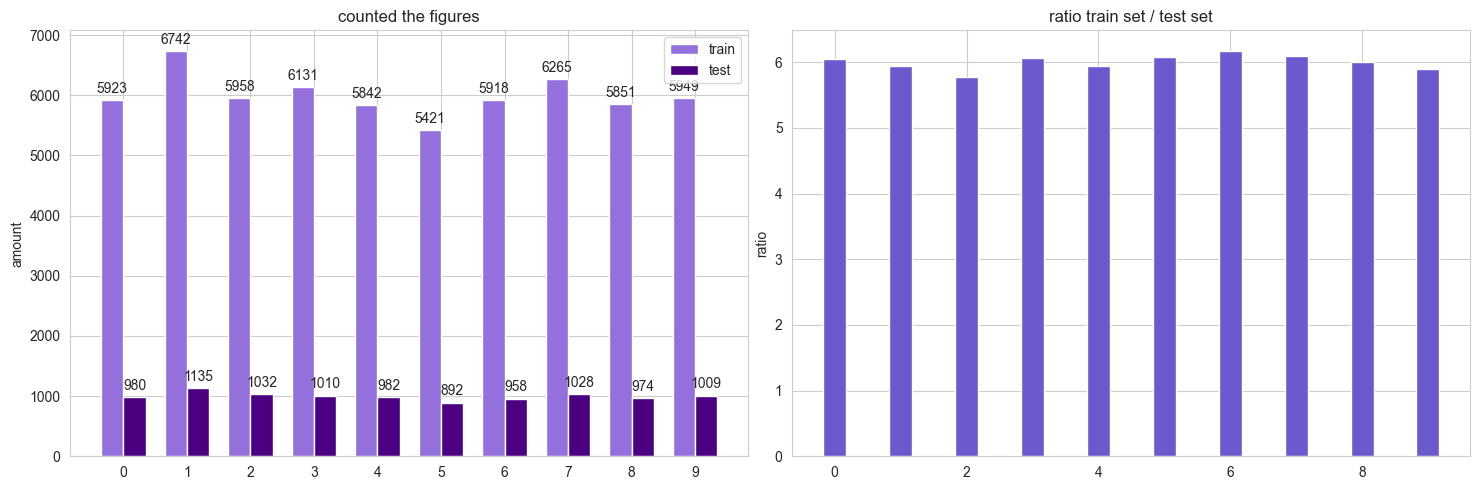

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

figure_train, count_train = np.unique(y_train, return_counts=True)
figure_test, count_test = np.unique(y_test, return_counts=True)
ratio = count_train/count_test
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
size_train = y_train.size
size_test = y_test.size
print("train set size: ", size_train, " | test set size: ", size_test)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(15, 5))
rects1 = ax[0].bar(x - width/2, count_train, width, label='train', color='mediumpurple')
rects2 = ax[0].bar(x + width/2, count_test, width, label='test', color='indigo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('amount')
ax[0].set_title('counted the figures')
ax[0].set_xticks(x, labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)

fig.tight_layout()

ax[1].bar(x, ratio, width, label='train', color='slateblue')
ax[1].set_ylabel('ratio')
ax[1].set_title('ratio train set / test set')

plt.show()

Here you can see the distribution of the figures. They are not evenly distributed. In the training set (in blue) 1's are the most with 6742 and 5's are fewest with 5421. The test set is shown in orange. Let's have a loot at the ratios. To do so, the amount of train figures is divided by the amount of test figures.

You can see the ratios are around 6, like expected because there are 60000 train and 10000 test figures. The conclusion is that the distribution of the figure amounts of both sets are very similar.


 Plot of the first 10 samples in the MNIST training set


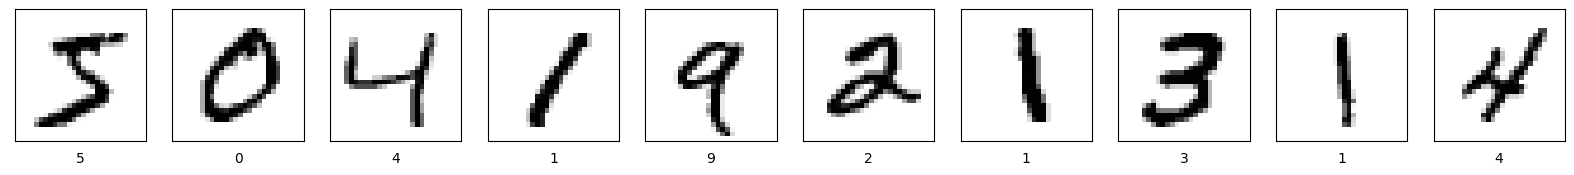

In [6]:
print('\n Plot of the first 10 samples in the MNIST training set')
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Explainability


Starting with this basic model for reference. It includes just an input layer with 28 x 28 values and a dense (output) layer with 10 units. For comparability, these layers are gone be the same for the following models and this is the basic reference model to discuss changes.

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [8]:
model_ref = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation=tf.nn.softmax)
])

model_ref.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ref = model_ref.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 1.4079 - accuracy: 0.7399 - val_loss: 0.8909 - val_accuracy: 0.8372
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.8461 - val_loss: 0.5567 - val_accuracy: 0.8725
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.8717 - val_loss: 0.4403 - val_accuracy: 0.8897
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8856 - val_loss: 0.3886 - val_accuracy: 0.8994
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8937 - val_loss: 0.3586 - val_accuracy: 0.9055
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3600 - accuracy: 0.8995 - val_loss: 0.3404 - val_accuracy: 0.9096
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.9038 - val_loss: 0.3276 - val_accuracy: 0.9133
Epoch 

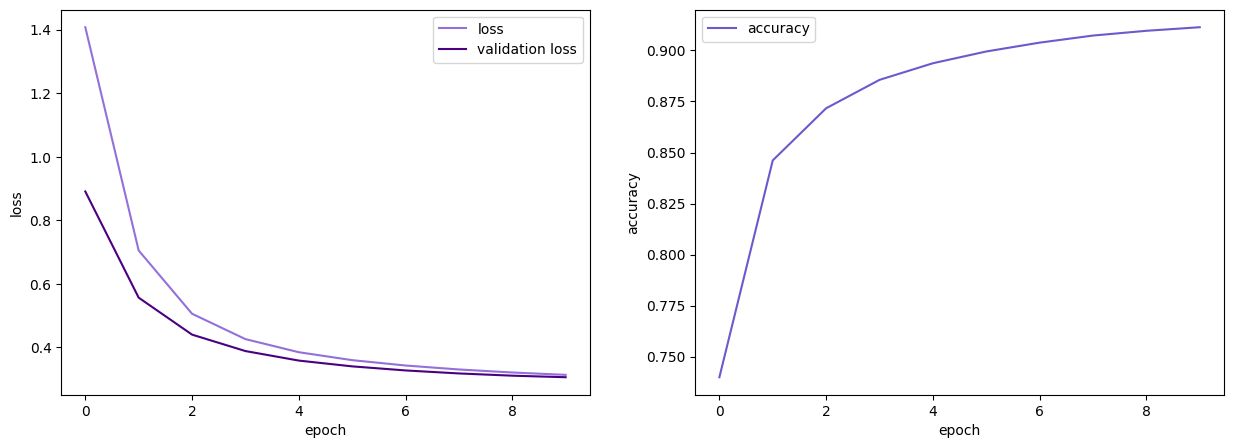

In [9]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].plot(history_ref.history["loss"], color='mediumpurple')
axs[0].plot(history_ref.history["val_loss"], color='indigo')
# axs[0].ylabel("loss")
# axs[0].xlabel("epoch")
# axs[0].title("model loss")
axs[0].legend(["loss", "validation loss"], loc="best")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')


axs[1].plot(history_ref.history["accuracy"], color='slateblue')
# axs[1].xlabel("epoch")
# axs[1].title("model accuracy")
axs[1].legend(["accuracy"], loc="best")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')

plt.show()

This graph on the left is showing the loss of the test set and the loss of the validation set. On the right you can see the accuracy of the model.
The next models are keras core layers.

In [10]:
model_dense = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_dense.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with dense layer")
history_dense = model_dense.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with dense layer
Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 1.3476 - accuracy: 0.7094 - val_loss: 0.7908 - val_accuracy: 0.8372
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.6031 - accuracy: 0.8596 - val_loss: 0.4663 - val_accuracy: 0.8862
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8874 - val_loss: 0.3784 - val_accuracy: 0.8981
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8989 - val_loss: 0.3401 - val_accuracy: 0.9062
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.9066 - val_loss: 0.3207 - val_accuracy: 0.9092
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.9103 - val_loss: 0.3083 - val_accuracy: 0.9122
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.9139 - val_

In [11]:
model_activation = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_activation.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with activation layer")
history_activation = model_activation.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with activation layer
Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 1.4237 - accuracy: 0.7224 - val_loss: 0.8977 - val_accuracy: 0.8366
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.7093 - accuracy: 0.8473 - val_loss: 0.5563 - val_accuracy: 0.8739
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.8724 - val_loss: 0.4411 - val_accuracy: 0.8885
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4260 - accuracy: 0.8855 - val_loss: 0.3888 - val_accuracy: 0.9000
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3845 - accuracy: 0.8944 - val_loss: 0.3592 - val_accuracy: 0.9051
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.9000 - val_loss: 0.3405 - val_accuracy: 0.9091
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.9046 -

In [12]:
model_conv2D  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_conv2D.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with Convolutional layer")
history_conv2D = model_conv2D.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with Convolutional layer
Epoch 1/10
118/118 [==============================] - 11s 87ms/step - loss: 0.4682 - accuracy: 0.8724 - val_loss: 0.3150 - val_accuracy: 0.9104
Epoch 2/10
118/118 [==============================] - 10s 81ms/step - loss: 0.3048 - accuracy: 0.9115 - val_loss: 0.3031 - val_accuracy: 0.9117
Epoch 3/10
118/118 [==============================] - 9s 80ms/step - loss: 0.2879 - accuracy: 0.9169 - val_loss: 0.3376 - val_accuracy: 0.8982
Epoch 4/10
118/118 [==============================] - 9s 78ms/step - loss: 0.2798 - accuracy: 0.9201 - val_loss: 0.3126 - val_accuracy: 0.9132
Epoch 5/10
118/118 [==============================] - 9s 79ms/step - loss: 0.2742 - accuracy: 0.9221 - val_loss: 0.2873 - val_accuracy: 0.9180
Epoch 6/10
118/118 [==============================] - 13s 114ms/step - loss: 0.2688 - accuracy: 0.9232 - val_loss: 0.2979 - val_accuracy: 0.9140
Epoch 7/10
118/118 [==============================] - 13s 107ms/step - loss: 0.2647 - ac

In [13]:
model_lambda = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Lambda(lambda x: x ** 2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_lambda.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with lambda layer")
history_lambda = model_lambda.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with lambda layer
Epoch 1/10
118/118 [==============================] - 2s 6ms/step - loss: 1.8161 - accuracy: 0.6856 - val_loss: 1.4603 - val_accuracy: 0.7907
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 1.2263 - accuracy: 0.8016 - val_loss: 1.0274 - val_accuracy: 0.8218
Epoch 3/10
118/118 [==============================] - 1s 4ms/step - loss: 0.9020 - accuracy: 0.8257 - val_loss: 0.7901 - val_accuracy: 0.8433
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.7237 - accuracy: 0.8415 - val_loss: 0.6548 - val_accuracy: 0.8568
Epoch 5/10
118/118 [==============================] - 1s 4ms/step - loss: 0.6190 - accuracy: 0.8526 - val_loss: 0.5729 - val_accuracy: 0.8653
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5527 - accuracy: 0.8620 - val_loss: 0.5190 - val_accuracy: 0.8702
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5071 - accuracy: 0.8687 - val

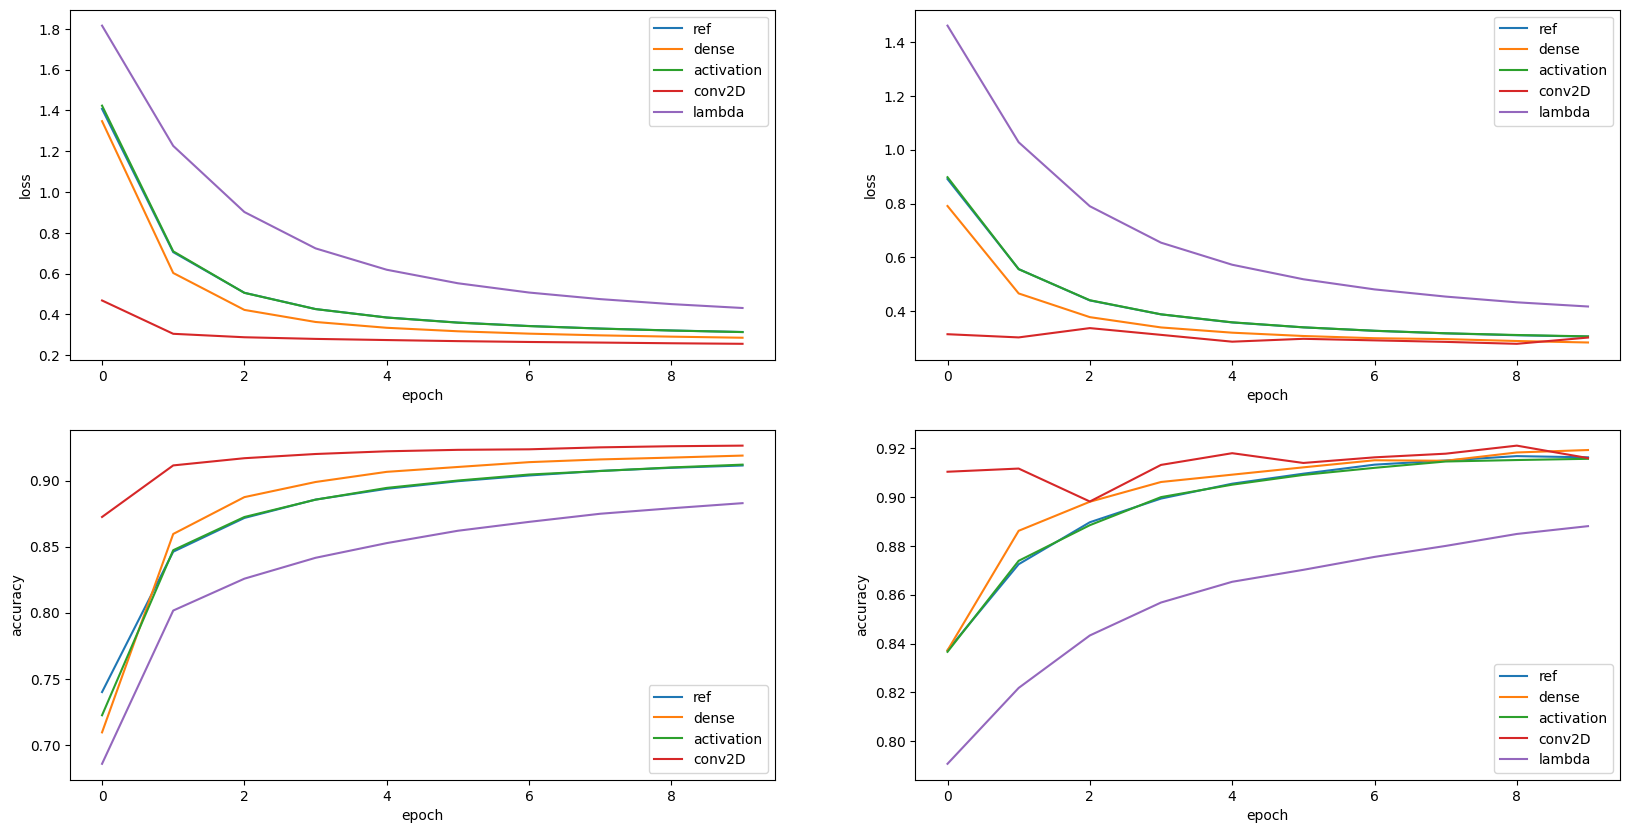

In [14]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_dense.history["loss"])
axs[0,0].plot(history_activation.history["loss"])
axs[0,0].plot(history_conv2D.history["loss"])
axs[0,0].plot(history_lambda.history["loss"])

axs[0,0].legend(["ref", "dense", "activation", "conv2D", "lambda"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_dense.history["val_loss"])
axs[0,1].plot(history_activation.history["val_loss"])
axs[0,1].plot(history_conv2D.history["val_loss"])
axs[0,1].plot(history_lambda.history["val_loss"])


axs[0,1].legend(["ref", "dense", "activation", "conv2D", "lambda"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_dense.history["accuracy"])
axs[1,0].plot(history_activation.history["accuracy"])
axs[1,0].plot(history_conv2D.history["accuracy"])
axs[1,0].plot(history_lambda.history["accuracy"])


axs[1,0].legend(["ref", "dense", "activation", "conv2D"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_dense.history["val_accuracy"])
axs[1,1].plot(history_activation.history["val_accuracy"])
axs[1,1].plot(history_conv2D.history["val_accuracy"])
axs[1,1].plot(history_lambda.history["val_accuracy"])

axs[1,1].legend(["ref", "dense", "activation", "conv2D", "lambda"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

We can see the layers behave different, especially the dense layer. Just this one 10 unit dense layer is improving the model decisive. It seems like the other ones do not have a noticeable influence at all. Let's take a look at each layer and try to understand them.

**Dense layer**: The first parameter amount of units (10) and the input size are telling the system how the weight matrix should be created. At the same time this is the output size of this layer. In this way as an output layer (like in the base model) the highest value can be taken as prediction.

**Activation layer**: This layer applies an activation function to an output. In this case the 'relu' function, which just converts all negative input values into 0's and leaves the others as usual. In the MNIST data set are no negative values, so it is clear that this layer does not have a noticeable impact.

**Convolutional layer**: Different to the dense layer this layer is not working on pixel level. It can recognize patterns like lines or areas. This behaviour is interesting for image recognition. In the plots the model with a convolutional layer got the best results for the training set. The recognition is done by chopping the pixel level down with a filter, so a specific composition of pixels, results in a certain type of new structure. In this way circles, lines or curves can be specifically recognized. This layer property is practical for image recognition because the network learns not only on the pixel level, but on a higher structure layer.

**Lambda layer**: The lambda layer can be used to specify an additional operation to the model. In this case the input values are getting squared. Unfortunately this does not improve the network. With the square function included the model puts out the worst results.

The conclusion is to focus on the dense and convolutional layers. The dense layer because it puts out the best results in matter of the test set and the convolutional layer because of the good results of the training set.

In [7]:
model_1  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model 1")
history_1 = model_1.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

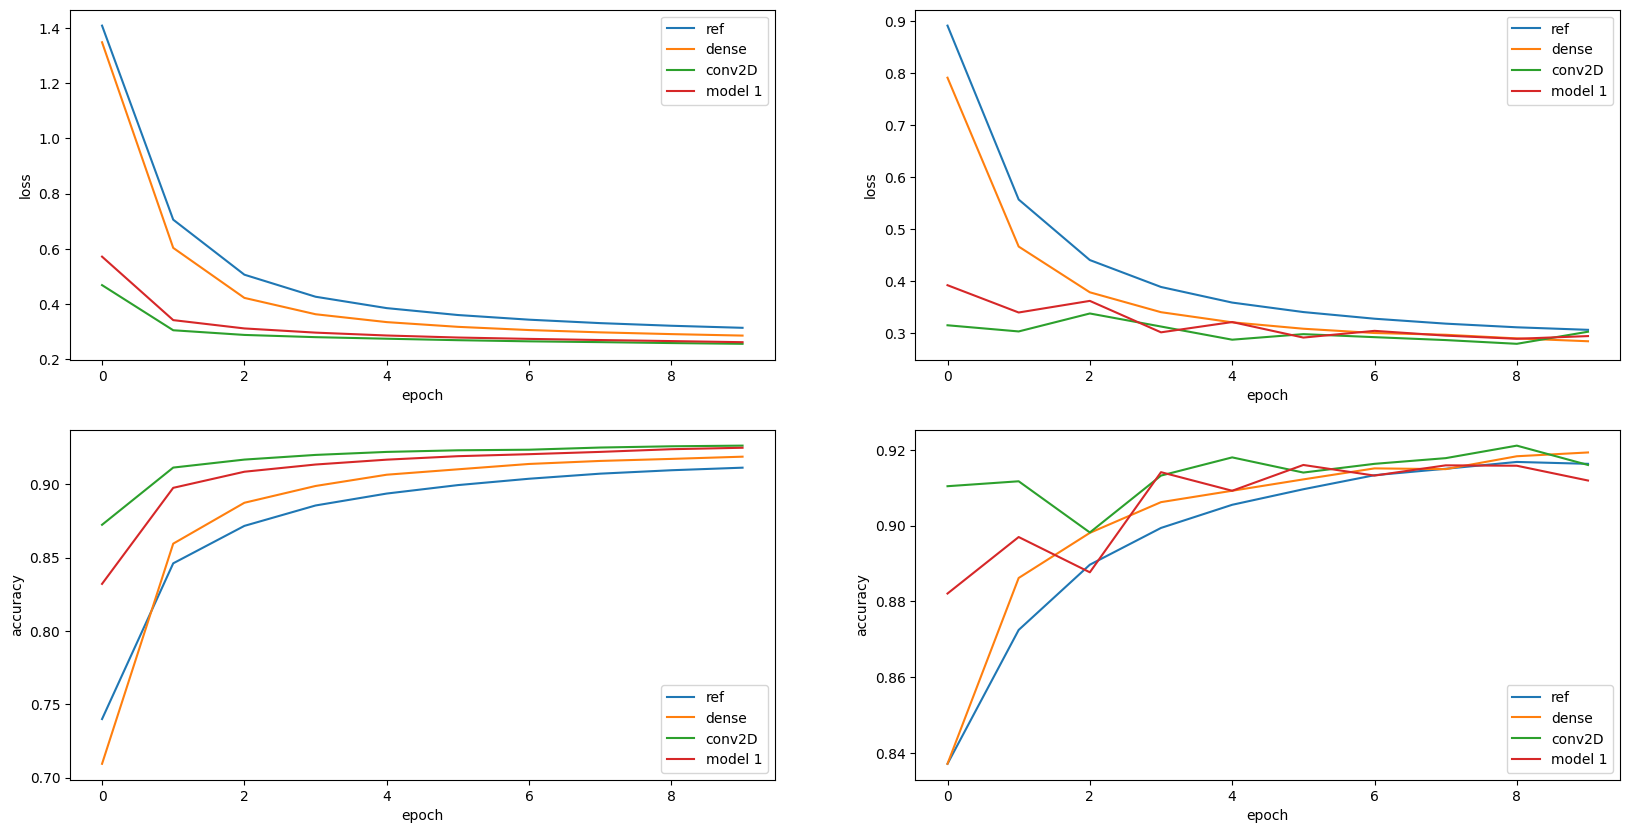

In [16]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_dense.history["loss"])
axs[0,0].plot(history_conv2D.history["loss"])
axs[0,0].plot(history_1.history["loss"])

axs[0,0].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_dense.history["val_loss"])
axs[0,1].plot(history_conv2D.history["val_loss"])
axs[0,1].plot(history_1.history["val_loss"])

axs[0,1].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_dense.history["accuracy"])
axs[1,0].plot(history_conv2D.history["accuracy"])
axs[1,0].plot(history_1.history["accuracy"])

axs[1,0].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_dense.history["val_accuracy"])
axs[1,1].plot(history_conv2D.history["val_accuracy"])
axs[1,1].plot(history_1.history["val_accuracy"])

axs[1,1].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

This result is sobering. The combination is not even better than the layer convolutional itself. Before adding new layers of the same kind or expand the existing layers, a new feature is included into the model, maxpolling. This layer pools the pixels together, so the strongest features are getting summarized in a new sized matrix. This layer works especially with the convolutional layer very good together. Because the first layer is putting out some structures and the second layer puts out the most prominent points.

In [17]:
model_2  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model 2")
history_2 = model_2.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model 1
Epoch 1/10
118/118 [==============================] - 12s 94ms/step - loss: 0.7817 - accuracy: 0.7908 - val_loss: 0.3926 - val_accuracy: 0.8868
Epoch 2/10
118/118 [==============================] - 11s 92ms/step - loss: 0.3385 - accuracy: 0.9022 - val_loss: 0.2998 - val_accuracy: 0.9121
Epoch 3/10
118/118 [==============================] - 11s 91ms/step - loss: 0.2804 - accuracy: 0.9178 - val_loss: 0.2619 - val_accuracy: 0.9260
Epoch 4/10
118/118 [==============================] - 10s 88ms/step - loss: 0.2497 - accuracy: 0.9282 - val_loss: 0.2385 - val_accuracy: 0.9329
Epoch 5/10
118/118 [==============================] - 10s 88ms/step - loss: 0.2277 - accuracy: 0.9341 - val_loss: 0.2318 - val_accuracy: 0.9350
Epoch 6/10
118/118 [==============================] - 11s 91ms/step - loss: 0.2097 - accuracy: 0.9406 - val_loss: 0.2141 - val_accuracy: 0.9352
Epoch 7/10
118/118 [==============================] - 10s 88ms/step - loss: 0.1943 - accuracy: 0.9441 - val_l

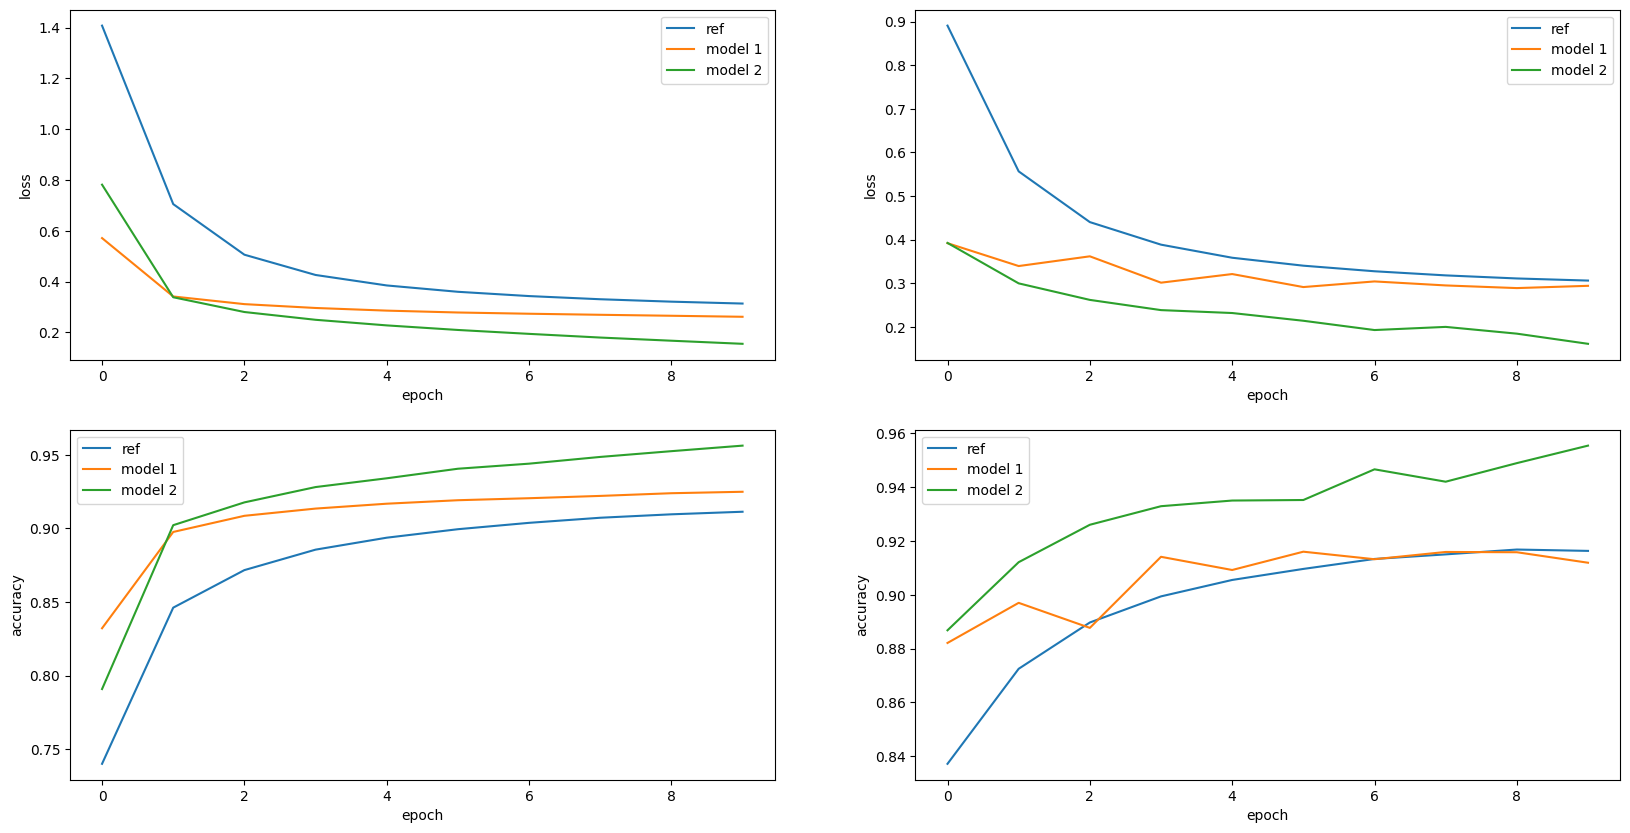

In [59]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_1.history["loss"])
axs[0,0].plot(history_2.history["loss"])


axs[0,0].legend(["ref", "model 1", "model 2"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_1.history["val_loss"])
axs[0,1].plot(history_2.history["val_loss"])


axs[0,1].legend(["ref", "model 1", "model 2"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_1.history["accuracy"])
axs[1,0].plot(history_2.history["accuracy"])

axs[1,0].legend(["ref", "model 1", "model 2"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_1.history["val_accuracy"])
axs[1,1].plot(history_2.history["val_accuracy"])

axs[1,1].legend(["ref", "model 1", "model 2"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

This looks promising. The model 2 with the maxpolling layer performs better in every case. Next step is to optimize the existing model. To get more accuracy the model should train for more epochs, with a higher learning rate and beacause this takes time with a higher batch size as well.

In [37]:
print("\nStarting to train model 2")
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2_2 = model_2.fit(
    x=x_train,
    y=y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_test,y_test),
)


Starting to train model 2
Epoch 1/20
118/118 [==============================] - 13s 105ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.2428 - val_accuracy: 0.9698
Epoch 2/20
118/118 [==============================] - 12s 98ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.2300 - val_accuracy: 0.9693
Epoch 3/20
118/118 [==============================] - 11s 97ms/step - loss: 0.0117 - accuracy: 0.9957 - val_loss: 0.2687 - val_accuracy: 0.9654
Epoch 4/20
118/118 [==============================] - 11s 94ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.2638 - val_accuracy: 0.9658
Epoch 5/20
118/118 [==============================] - 11s 93ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.2601 - val_accuracy: 0.9690
Epoch 6/20
118/118 [==============================] - 11s 91ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.2532 - val_accuracy: 0.9669
Epoch 7/20
118/118 [==============================] - 11s 90ms/step - loss: 0.0101 - accuracy: 0.9966 - val_

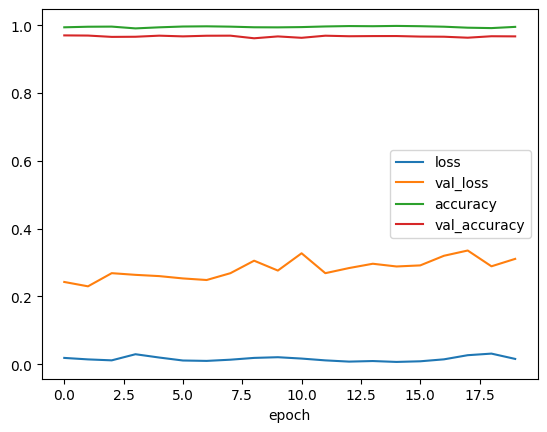

In [39]:
plt.plot(history_2_2.history["loss"])
plt.plot(history_2_2.history["val_loss"])
plt.plot(history_2_2.history["accuracy"])
plt.plot(history_2_2.history["val_accuracy"])

plt.xlabel("epoch")
# plt.title("model loss")
plt.legend(["loss", "val_loss", "accuracy", "val_accuracy"], loc="best")
plt.show()

In this way the model got an accuracy of over 99%. But the model is overfitting, the test set is drifting away. With the experience from tutorial 1.2 (optimization) and 1.3 (regularization) the following model should do better. It got a regulator to prevent the overfitting. The dense layer increased by sice to achieve a good accuracy.

In [ ]:
model_3  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model 3")
history_3 = model_3.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test,y_test),
)


Starting to train model 3
Epoch 1/10
938/938 [==============================] - 20s 20ms/step - loss: 0.6583 - accuracy: 0.8911 - val_loss: 0.1444 - val_accuracy: 0.9605
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0977 - accuracy: 0.9728 - val_loss: 0.0947 - val_accuracy: 0.9742
Epoch 3/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.1092 - val_accuracy: 0.9719
Epoch 4/10
243/938 [======>.......................] - ETA: 12s - loss: 0.0356 - accuracy: 0.9880

In [9]:
plt.plot(history_3.history["loss"])
plt.plot(history_3.history["val_loss"])
plt.plot(history_3.history["accuracy"])
plt.plot(history_3.history["val_accuracy"])

plt.xlabel("epoch")
# plt.title("model loss")
plt.legend(["loss", "val_loss", "accuracy", "val_accuracy"], loc="best")
plt.show()


Starting to train model 3
Epoch 1/10
938/938 [==============================] - 19s 19ms/step - loss: 0.4042 - accuracy: 0.9215 - val_loss: 0.1293 - val_accuracy: 0.9632
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0874 - accuracy: 0.9745 - val_loss: 0.0777 - val_accuracy: 0.9774
Epoch 3/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0768 - val_accuracy: 0.9779
Epoch 4/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0906 - val_accuracy: 0.9729
Epoch 5/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0329 - accuracy: 0.9902 - val_loss: 0.0934 - val_accuracy: 0.9777
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0983 - val_accuracy: 0.9775
Epoch 7/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0270 - accuracy: 0.9919 - val_l

## Performance

This model seems good enough, with an accuracy of over 99% and a validation accuracy of 98% it got already a good performance.

313/313 [==============================] - 1s 4ms/step


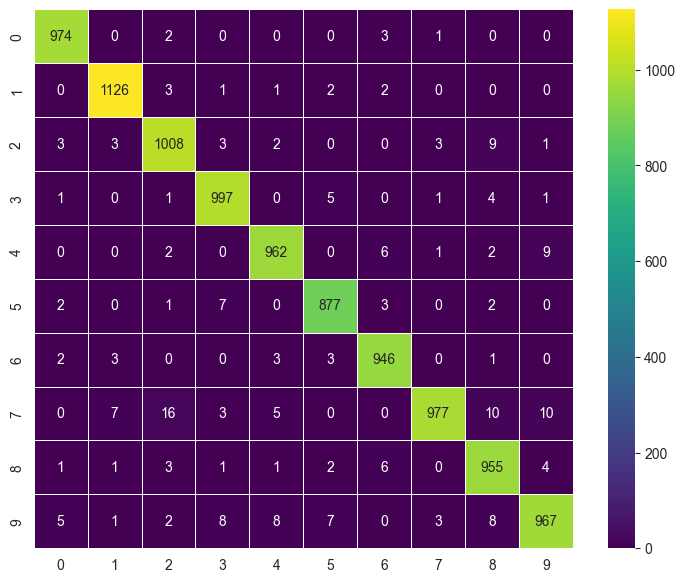

In [13]:
predictions = model_3.predict([x_test])
predictions = np.argmax(predictions, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)

plt.show()

# Literature and sources
[1] https://keras.io/
[2] https://www.tensorflow.org/
[3] https://blog.paperspace.com/working-with-the-lambda-layer-in-keras/
[4] https://medium.com/analytics-vidhya/image-augmentation-using-keras-99072b490c72
[5] https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392
